In [1]:
import zipfile
with zipfile.ZipFile('./customer-segmentation-tutorial-in-python.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [12]:
import pandas as pd

# ubah file csv menjadi dataframe
df = pd.read_csv('./Mall_Customers.csv')

df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
# ubah nama kolom
df = df.rename(columns={'Gender' : 'gender', 'Age' : 'age', 'Annual Income (k$)' : 'annual_income', 'Spending Score (1-100)' : "spending_score" })

# ubah data kategorik menjadi numerik
df['gender'].replace(['Female', "Male"], [0,1], inplace=True)

# tampilkan data yang sudah di preproces
df.head(5)

/tmp/ipykernel_10394/210835120.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace(['Female', "Male"], [0,1], inplace=True)
/tmp/ipykernel_10394/210835120.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace(['Female', "Male"], [0,1], inplace=True)


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [14]:
from sklearn.cluster import KMeans

# menghilangkan CustomerID dan age
X = df.drop(['CustomerID', 'gender'], axis=1)


# membuat list yang berisi inertia
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(X)
    clusters.append(km.inertia_)

### Penjelasan Kode Diatas

Kode yang ditampilkan merupakan bagian dari proses clustering menggunakan algoritma KMeans dari library scikit-learn di Python. Algoritma KMeans merupakan salah satu algoritma untuk melakukan clustering yang membagi dataset menjadi beberapa kelompok (clusters) berdasarkan kesamaan fitur-fiturnya. Berikut penjelasan detail dari setiap baris kode:

1. **Import KMeans from sklearn.cluster**

```python
from sklearn.cluster import KMeans
```
Baris ini melakukan import class `KMeans` dari modul `sklearn.cluster`. Class `KMeans` adalah implementasi algoritma K-Means clustering dalam scikit-learn.

2. **Drop Kolom Tertentu dari DataFrame**

```python
X = df.drop(['CustomerID', 'gender'], axis=1)
```
Di sini, `df` merupakan dataframe yang berisi data yang akan di-cluster. Fungsi `drop()` digunakan untuk menghilangkan kolom `CustomerID` dan `gender` dari dataframe tersebut. Parameter `axis=1` menunjukkan bahwa penghapusan dilakukan pada kolom (bukan baris). Hasil dari kode ini adalah dataframe `X` yang telah dikurangi dua kolom tersebut, yang kemudian akan digunakan untuk proses clustering.

3. **Inisialisasi List Untuk Menyimpan Nilai Inertia**

```python
clusters = []
```
Kode ini menginisialisasi list kosong dengan nama `clusters`. List ini nantinya akan diisi dengan nilai inertia dari hasil setiap clustering yang dilakukan.

4. **Looping Untuk Mencari Nilai Inertia dengan Berbagai Jumlah Cluster**

```python
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)
```
Looping ini berjalan dari 1 hingga 10 (diambil dari `range(1,11)`), di mana pada setiap iterasi akan dibentuk model KMeans dengan jumlah cluster `i`. `n_clusters=i` menetapkan jumlah cluster yang akan dibentuk. 

`.fit(X)` adalah metode yang digunakan untuk mengajarkan model KMeans dengan data `X` yang telah dipreparasi sebelumnya.

`km.inertia_` mendapatkan nilai inertia dari model yang baru saja di-fit. Nilai inertia merupakan ukuran seberapa baik data di-cluster. Secara spesifik, inertia mengukur jumlah jarak kuadrat dari setiap sampel ke sentroid cluster terdekat. Nilai ini kemudian di-append ke dalam list `clusters`.

### Kesimpulan

Jadi, kode tersebut melakukan preprocessing data dengan menghilangkan kolom yang tidak diperlukan, kemudian mencoba clustering dengan menggunakan 1 sampai dengan 10 cluster untuk menemukan jumlah cluster yang paling optimal berdasarkan nilai inertia. Nilai inertia yang rendah menunjukkan bahwa sampel dalam cluster tersebut relatif lebih dekat dengan centroid mereka, yang merupakan indikasi dari clustering yang baik.

In [7]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Inertia')

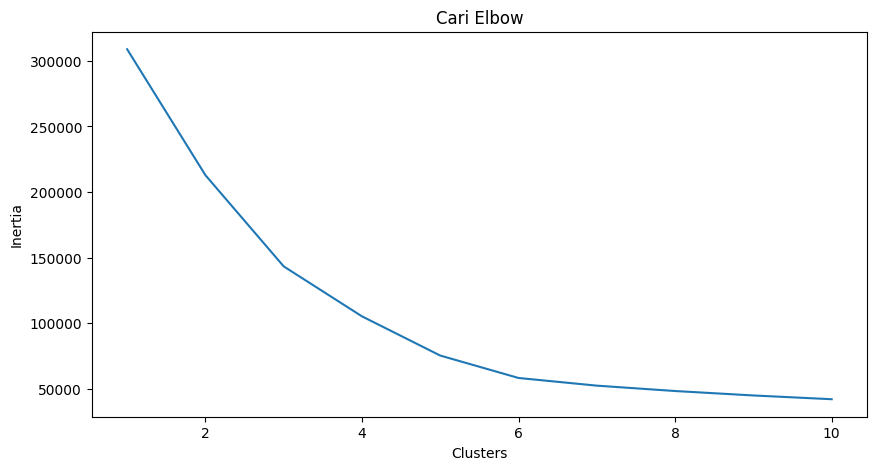

In [17]:
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

# membuat plot inertia
fig,ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

### Penjelasan Kode Visualisasi Inertia Diatas

Setelah melakukan clustering dan mengumpulkan nilai inertia untuk berbagai jumlah cluster, sangat berguna untuk memvisualisasikan nilai-nilai inertia tersebut untuk mendapatkan insight mengenai jumlah cluster yang optimal. Ini dilakukan dengan membuat plot nilai inertia yang biasanya disebut sebagai "Elbow Method". Di bawah ini adalah penjelasan kode untuk membuat plot tersebut:

1. **Import Libraries**

```python
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
```
- `matplotlib.pyplot` digunakan untuk membuat plot dan di-import dengan alias `plt`. `%matplotlib inline` adalah magic command khusus untuk Jupyter notebooks yang memungkinkan kita untuk melihat plot langsung di bawah cells kode.
- `seaborn` adalah library visualisasi data berbasis matplotlib yang menyediakan interface tingkat tinggi untuk menggambar grafik yang menarik dan informatif. Dalam hal ini, `seaborn` di-import dengan alias `sns`.

2. **Membuat Plot Inertia menggunakan Seaborn**

```python
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
```
- `plt.subplots(figsize=(8, 4))`: Inisialisasi figure dengan ukuran tertentu (8x4 inci). Ini mengembalikan objek figure dan axes (`fig`, `ax`) yang digunakan dalam plotting.
- `sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)`: Menggunakan Seaborn untuk membuat line plot. `x=list(range(1, 11))` adalah sebuah list dari 1 sampai 10 yang merepresentasikan jumlah cluster yang dicoba. `y=clusters` adalah list nilai inertia yang telah dihitung di kode sebelumnya. Argumen `ax=ax` menunjukkan bahwa plot akan dilakukan pada objek axes yang telah dibuat.
- `ax.set_title('Cari Elbow')`: Menetapkan judul plot menjadi "Cari Elbow". Ini mengindikasikan tujuan dari plot ini yaitu untuk mencari "elbow" atau titik belok pada plot, yang seringkali menandakan jumlah cluster yang optimal.
- `ax.set_xlabel('Clusters')` dan `ax.set_ylabel('Inertia')`: Menentukan label untuk sumbu X dan Y. Sumbu X akan berlabel "Clusters" yang menunjukkan jumlah cluster, dan sumbu Y berlabel "Inertia" yang menggambarkan nilai inertia dari masing-masing jumlah cluster tersebut.

### Kesimpulan

Plot "Elbow" tersebut berguna untuk memvisualisasikan bagaimana nilai inertia berubah dengan berbagai jumlah cluster. Pada titik di mana penurunan inertia mulai mengalami penurunan yang lebih lambat (titik belok atau "elbow"), inilah yang seringkali dianggap sebagai jumlah cluster yang optimal untuk data tersebut. Ini karena penambahan cluster setelah titik tersebut tidak memberikan penurunan inertia yang signifikan lagi, yang mengindikasikan bahwa struktur cluster telah cukup terdefinisi dengan jumlah tersebut.

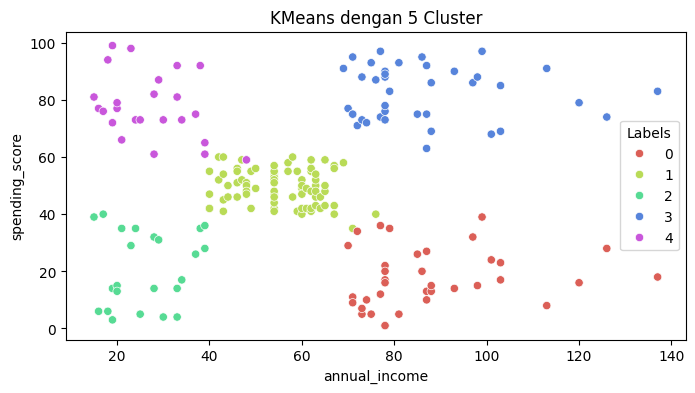

In [16]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot K-Means dengan 5 kluster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

### Penjelasan Kode Diatas: Visualisasi KMeans dengan 5 Cluster

Kode tersebut melakukan clustering pada dataset menggunakan algoritma KMeans dan visualisasi hasilnya dengan scatter plot. Ini memberikan pengamatan visual tentang bagaimana data dikelompokkan ke dalam 5 cluster yang berbeda berdasarkan fitur `annual_income` dan `spending_score`. Berikut ini adalah penjelasan lengkap:

#### Membuat Objek KMeans dan Melakukan Fitting

```python
km5 = KMeans(n_clusters=5).fit(X)
```
- `KMeans(n_clusters=5)` membuat sebuah instansi dari KMeans dengan parameter `n_clusters=5`, yang menentukan akan dibuatnya 5 cluster dari data.
- `.fit(X)` metode ini mengajarkan KMeans pada dataset `X` yang telah disiapkan sebelumnya, sesuai dengan pengaturan number of clusters.

#### Menambahkan Kolom Label pada Dataset

```python
X['Labels'] = km5.labels_
```
- Setelah KMeans di-fit dengan data, model ini menghasilkan label untuk setiap data point, yang menandakan cluster mana data point tersebut termasuk. `km5.labels_` menghasilkan array dari label ini.
- `X['Labels'] = km5.labels_` menambahkan label ini sebagai kolom baru dalam dataframe `X`, yang memungkinkan setiap data point untuk dikaitkan dengan cluster tertentu.

#### Membuat Plot KMeans dengan 5 Klaster

```python
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()
```
- `plt.figure(figsize=(8,4))` menginisiasi figur baru untuk plotting dengan ukuran 8x4 inci.
- `sns.scatterplot()` digunakan untuk membuat scatter plot. `x=X['annual_income']` dan `y=X['spending_score']` menentukan sumbu-X dan sumbu-Y dari plot, yang menggunakan fitur `annual_income` dan `spending_score` dari dataset.
- Argumen `hue=X['Labels']` menentukan bahwa warna dari setiap titik akan berdasarkan label cluster yang telah diberikan oleh KMeans, memungkinkan visualisasi pembagian cluster di plot.
- `palette=sns.color_palette('hls', 5)` menentukan skema warna yang digunakan untuk membedakan 5 cluster yang berbeda.
- `plt.title('KMeans dengan 5 Cluster')` menambahkan judul pada plot.
- `plt.show()` menampilkan plot yang dihasilkan.

#### Kesimpulan

Melalui kode ini, kita dapat mengvisualisasikan bagaimana algoritma KMeans mengelompokkan dataset kedalam 5 cluster berdasarkan `annual_income` dan `spending_score`. Visualisasi ini membantu dalam memahami pola pengelompokan data dan bagaimana berbagai segmen (dalam hal ini, cluster) berbeda satu sama lain berdasarkan dua fitur tersebut.